In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
df = pd.read_csv("/content/Inventory Data.csv")
df.head()

,TransactionNo,TransactionDate,TransactionType,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,ItemName,SKU,...,DiscountAmount,OtherCharge,VATAmount,TAXAmount,LocationAddress,CustomerAddress,CustomerBirthDate,CustomerMarriageStatus,CustomerAgeInYear,PerInvoiceAverageAmount
0,S-18334,25-Oct-23,Sale,Brahmaputra,C-000173,M/S Bhai Bon Traders,Aqua Product,I-00202,Clean 100ml,ml,...,0.0,0.0,0.0,0.0,"Siyam Bhaban,Haluyaghat Road, Shambhuganj,My...",Vill:Soratia Post:Bhoilajan Shop Location:Shib...,4-Mar-88,NO,35 Year,44439.81
1,S-18333,25-Oct-23,Sale,Brahmaputra,C-000175,M/S Siddik Traders,Aqua Product,I-00202,Clean 100ml,ml,...,0.0,0.0,0.0,0.0,"Siyam Bhaban,Haluyaghat Road, Shambhuganj,My...",Vill:Gosthakandapara Post:Dapunia Shop Locatio...,2-Jun-86,NO,37 Year,12013.21
2,S-18301,22-Oct-23,Sale,Brahmaputra,C-000295,M/S Nupur Enterprise,Aqua Product,I-00202,Clean 100ml,ml,...,0.0,0.0,0.0,0.0,"Siyam Bhaban,Haluyaghat Road, Shambhuganj,My...","Shoilati,Koilati, Fotapur Royalbari, Kandya, N...",5-Jun-81,NO,42 Year,92327.94
3,S-18300,21-Oct-23,Sale,Brahmaputra,C-000163,M/S Bismillah Traders,Aqua Product,I-00202,Clean 100ml,ml,...,0.0,0.0,0.0,0.0,"Siyam Bhaban,Haluyaghat Road, Shambhuganj,My...","Banail Bazar, Tarail.",26-Aug-90,NO,33 Year,16732.52
4,S-18260,19-Oct-23,Sale,Brahmaputra,C-000880,M/S Ashraf Agro Complex,Aqua Product,I-00202,Clean 100ml,ml,...,0.0,0.0,0.0,0.0,"Siyam Bhaban,Haluyaghat Road, Shambhuganj,My...","kalibari,Jhanaigati ,Sherpur",10-May-93,NO,30 Year,11170.89


In [ ]:
df.drop(['CustomerBirthDate'],axis=1,inplace = True)

In [ ]:
df.shape

(1807, 33)

checking data  types of each columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionNo            1807 non-null   object 
 1   TransactionDate          1807 non-null   object 
 2   TransactionType          1807 non-null   object 
 3   Location                 1807 non-null   object 
 4   CustomerCode             1807 non-null   object 
 5   CustomerName             1807 non-null   object 
 6   ItemCategory             1807 non-null   object 
 7   ItemCode                 1807 non-null   object 
 8   ItemName                 1807 non-null   object 
 9   SKU                      1807 non-null   object 
 10  ProductAttributes        1680 non-null   object 
 11  BatchNo                  1807 non-null   object 
 12  StockType                1807 non-null   object 
 13  Cost                     1807 non-null   float64
 14  SaleQty                 

target feature is SaleQty

Categorical Features:

TransactionNo          
TransactionType
Location
                 
 CustomerCode            
 CustomerName             
 ItemCategory             
 ItemCode                 
 ItemName                 
 SKU                     
 ProductAttributes        
 BatchNo                  
 StockType

LocationAddress        
 CustomerAddress           
 CustomerBirthDate        
 CustomerMarriageStatus   
CustomerAgeInYear



In [ ]:
df['ProductAttributes'].value_counts()

100 ml      1614
500 ml        48
10000 gm      14
25000 gm       1
1000 gm        1
1000 ml        1
150 ml         1
Name: ProductAttributes, dtype: int64

converting date to date time data type

checking null values

In [ ]:
df.isnull().sum()

TransactionNo                0
TransactionDate              0
TransactionType              0
Location                     0
CustomerCode                 0
CustomerName                 0
ItemCategory                 0
ItemCode                     0
ItemName                     0
SKU                          0
ProductAttributes          127
BatchNo                      0
StockType                    0
Cost                         0
SaleQty                      0
SaleBonusQty                 0
SaleTotalQty                 0
MRP                          0
SaleAmount                   0
SR_Qty                       0
SR_BonusQty                  0
SR_TotalQty                  0
SR_Rate                      0
SR_Amount                    0
DiscountAmount               0
OtherCharge                  0
VATAmount                    0
TAXAmount                    0
LocationAddress              0
CustomerAddress              0
CustomerMarriageStatus       0
CustomerAgeInYear            0
PerInvoi

In [ ]:
df=df.fillna(method='pad',axis=1)


In [ ]:
df.isnull().sum()

TransactionNo              0
TransactionDate            0
TransactionType            0
Location                   0
CustomerCode               0
CustomerName               0
ItemCategory               0
ItemCode                   0
ItemName                   0
SKU                        0
ProductAttributes          0
BatchNo                    0
StockType                  0
Cost                       0
SaleQty                    0
SaleBonusQty               0
SaleTotalQty               0
MRP                        0
SaleAmount                 0
SR_Qty                     0
SR_BonusQty                0
SR_TotalQty                0
SR_Rate                    0
SR_Amount                  0
DiscountAmount             0
OtherCharge                0
VATAmount                  0
TAXAmount                  0
LocationAddress            0
CustomerAddress            0
CustomerMarriageStatus     0
CustomerAgeInYear          0
PerInvoiceAverageAmount    0
dtype: int64

In [ ]:
df.describe()

,TransactionNo,TransactionDate,TransactionType,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,ItemName,SKU,...,SR_Amount,DiscountAmount,OtherCharge,VATAmount,TAXAmount,LocationAddress,CustomerAddress,CustomerMarriageStatus,CustomerAgeInYear,PerInvoiceAverageAmount
count,1807,1807,1807,1807,1807,1807,1807,1807,1807,1807,...,1807.0,1807.0,1807.0,1807.0,1807.0,1807,1807,1807,1807,1807.00
unique,1585,403,2,14,513,501,1,13,13,4,...,7.0,1.0,1.0,1.0,1.0,14,494,2,51,512.00
top,S-17836,7-Mar-23,Sale,Karatoa,C-000499,M/S JS Agro Fisheries,Aqua Product,I-00202,Clean 100ml,ml,...,0.0,0.0,0.0,0.0,0.0,"Baropur Bisshoroad, Nungola, Bogura","Azompur Bazar, Zorargonj, Chattogram.",NO,34 Year,24126.24
freq,6,27,1801,241,25,25,1807,1614,1614,1664,...,1801.0,1807.0,1807.0,1807.0,1807.0,241,32,1342,151,25.00


numerical features

In [ ]:
sns.set()

<ipython-input-12-dcfbbdc6246b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cost'])


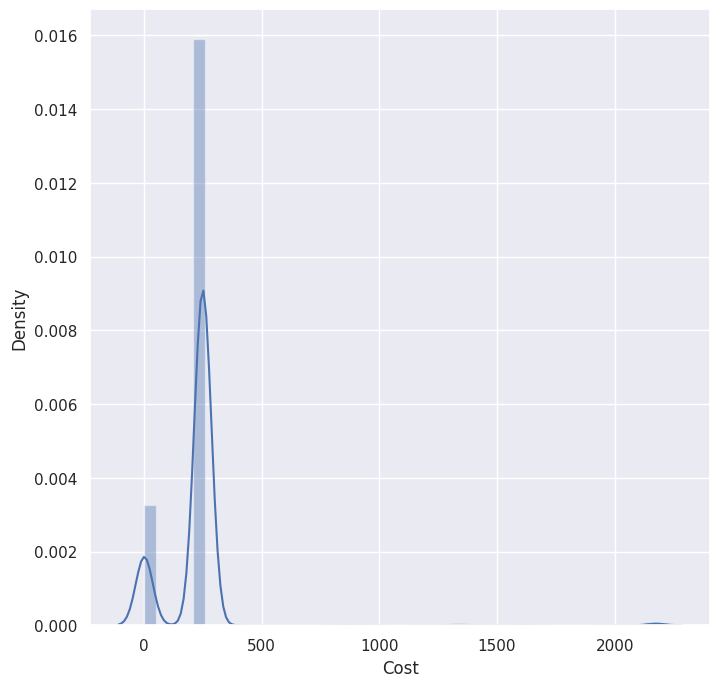

In [ ]:
# cost distribution
plt.figure(figsize=(8,8))
sns.distplot(df['Cost'])
plt.show()

<ipython-input-13-d06243e1df97>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SaleQty'])


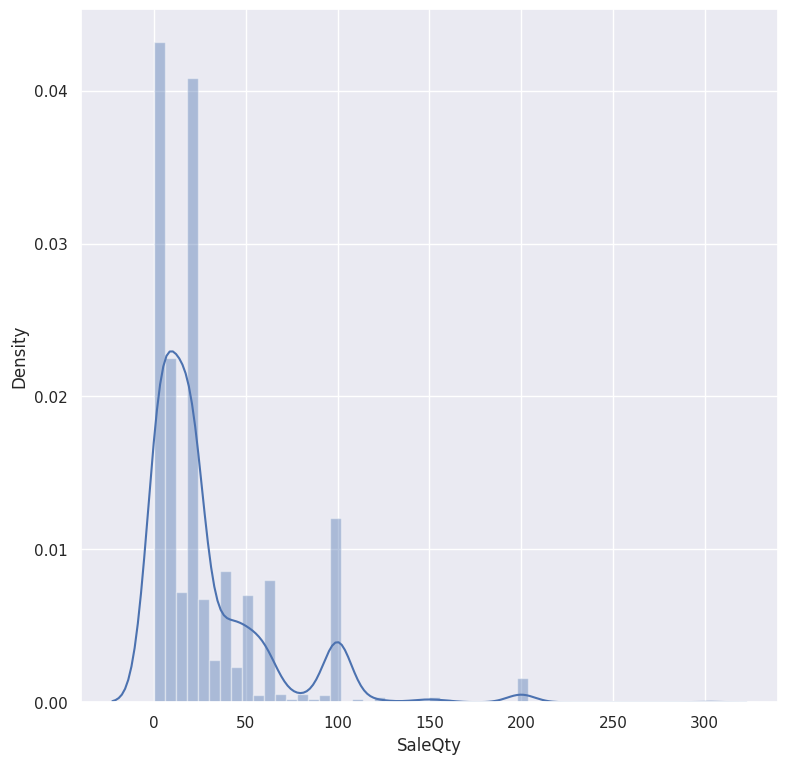

In [ ]:
# sale qty distribution
plt.figure(figsize=(9,9))
sns.distplot(df['SaleQty'])
plt.show()

<ipython-input-14-8d949444ebba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SaleBonusQty'])


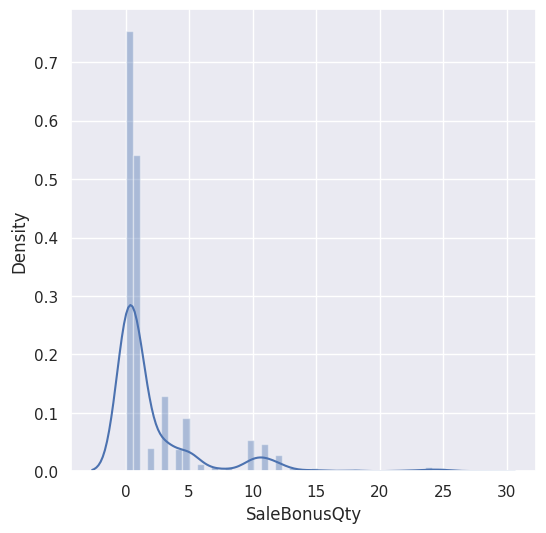

In [ ]:

plt.figure(figsize=(6,6))
sns.distplot(df['SaleBonusQty'])
plt.show()

<ipython-input-15-dcb6161e5fd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SaleTotalQty'])


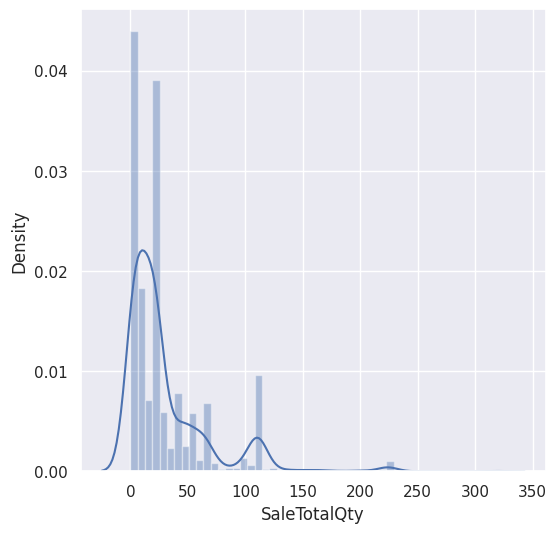

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SaleTotalQty'])
plt.show()

<ipython-input-16-cca529452dab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MRP'])


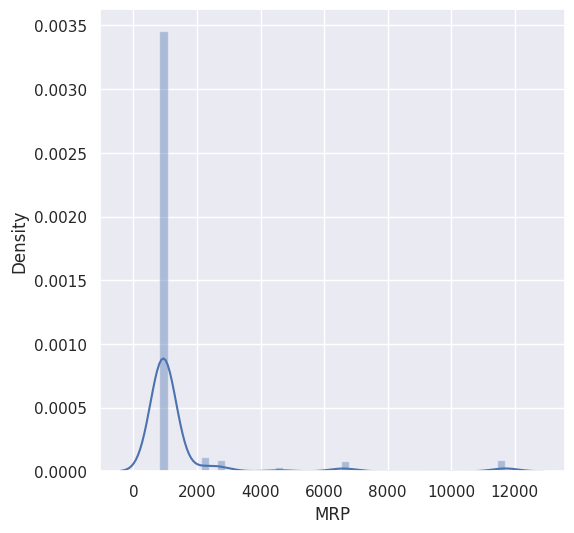

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['MRP'])
plt.show()

<ipython-input-17-c8f03e2be9bc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SaleAmount'])


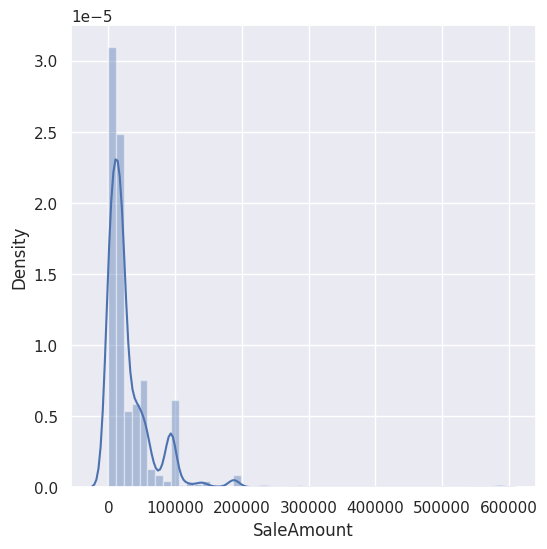

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SaleAmount'])
plt.show()

<ipython-input-18-bc4890951084>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SR_Qty'])


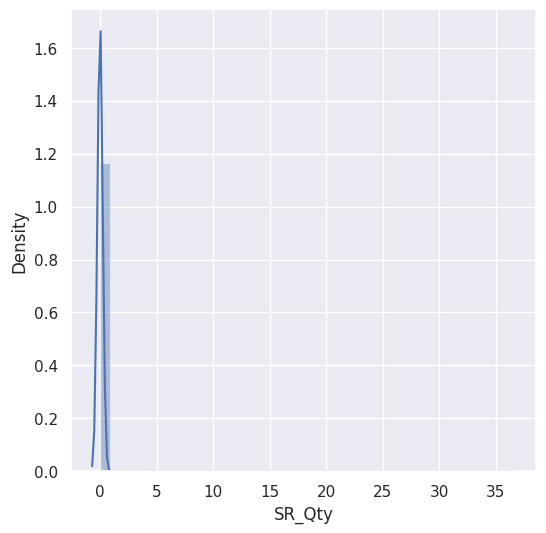

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SR_Qty'])
plt.show()

<ipython-input-19-2fca5475f1a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SR_BonusQty'])


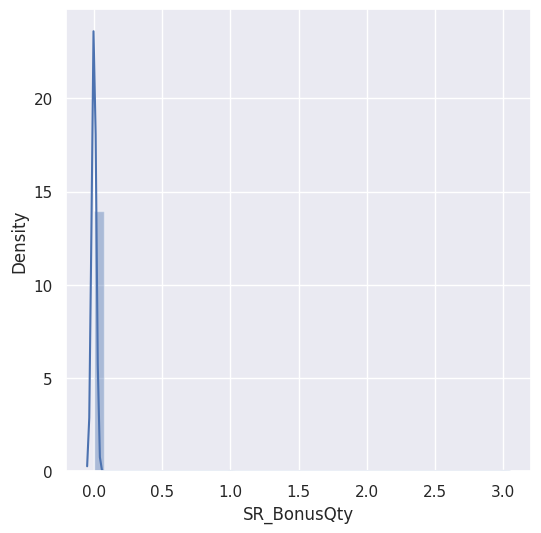

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SR_BonusQty'])
plt.show()

<ipython-input-20-ec1d340a3ffd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SR_TotalQty'])


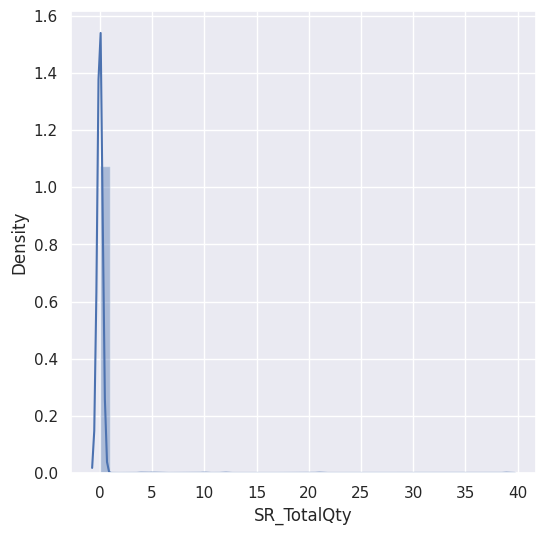

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SR_TotalQty'])
plt.show()

<ipython-input-21-b86ff5ad2eb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SR_Rate'])


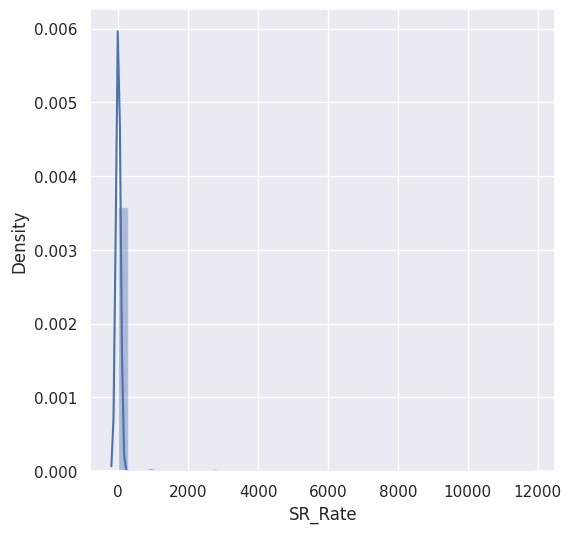

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SR_Rate'])
plt.show()

<ipython-input-22-221303dc24c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SR_Amount'])


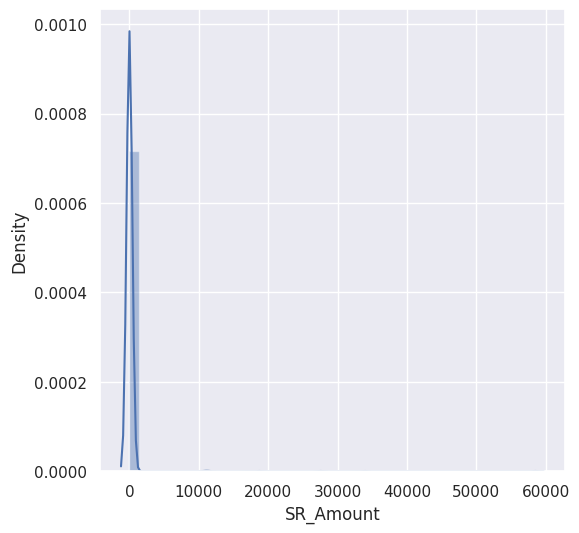

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['SR_Amount'])
plt.show()

<ipython-input-23-e52941806054>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiscountAmount'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


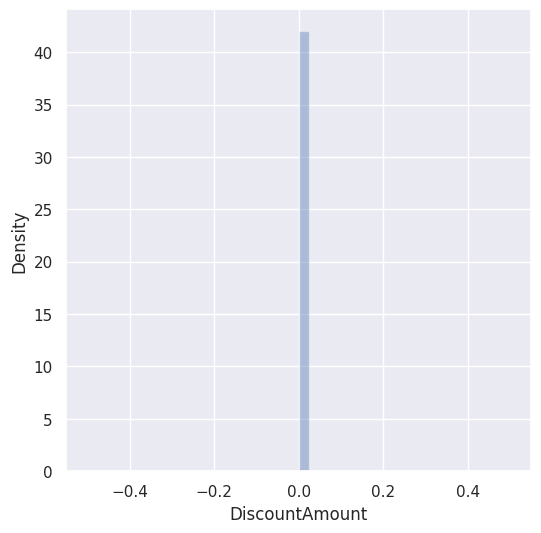

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['DiscountAmount'])
plt.show()

<ipython-input-24-c89c56d2bc2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OtherCharge'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


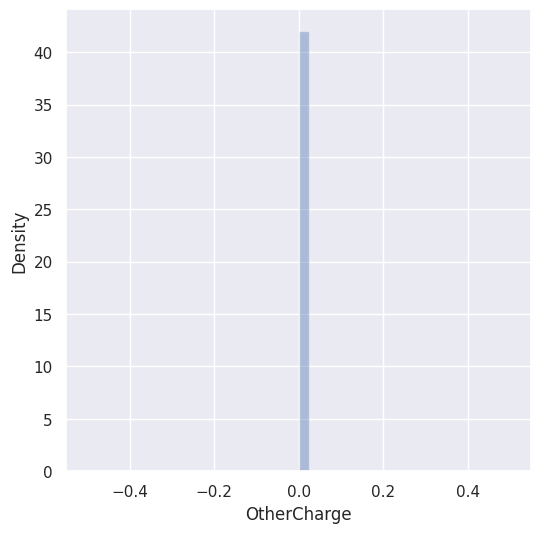

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['OtherCharge'])
plt.show()

<ipython-input-25-a6fa79dc2314>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VATAmount'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


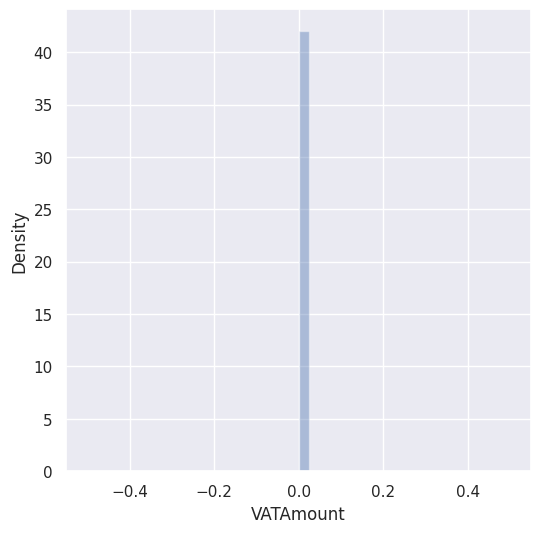

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['VATAmount'])
plt.show()

<ipython-input-26-da6ddba52723>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TAXAmount'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


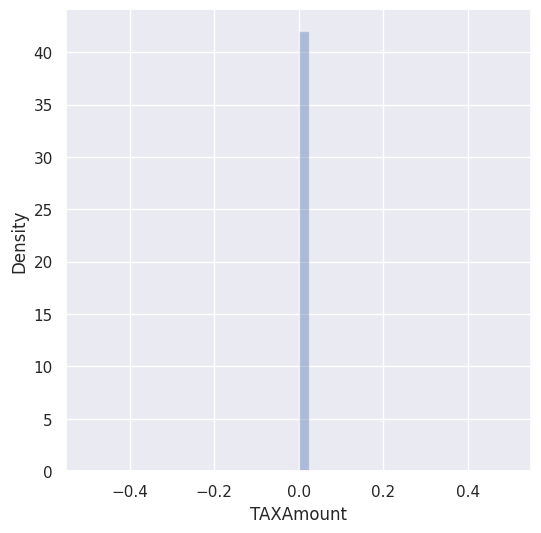

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['TAXAmount'])
plt.show()

<ipython-input-27-38dbf6086a3a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PerInvoiceAverageAmount'])


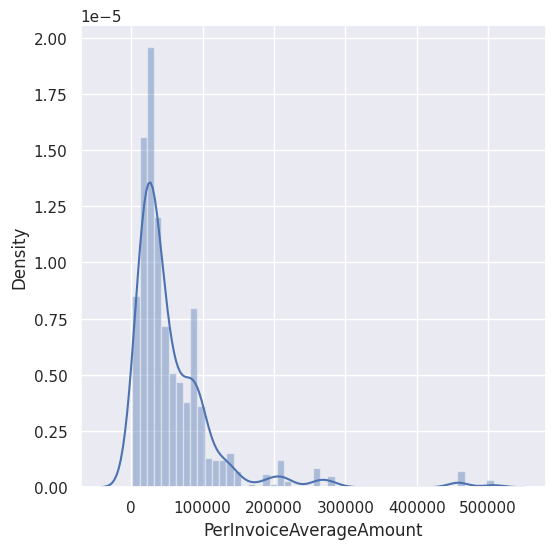

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['PerInvoiceAverageAmount'])
plt.show()

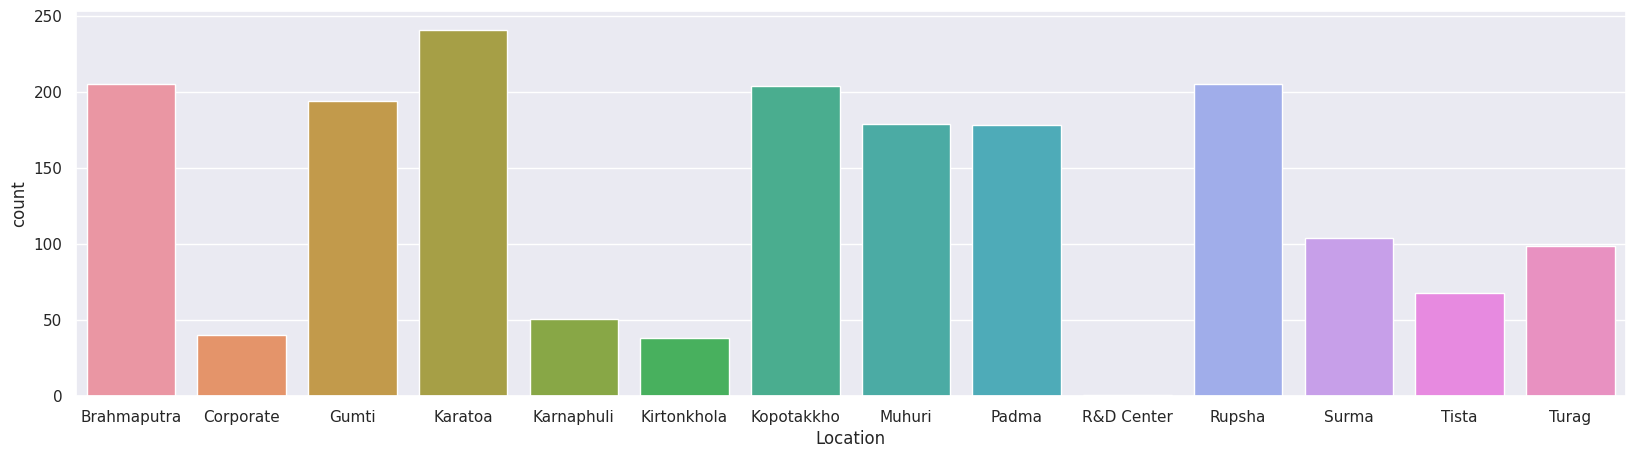

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Location', data=df)
plt.show()

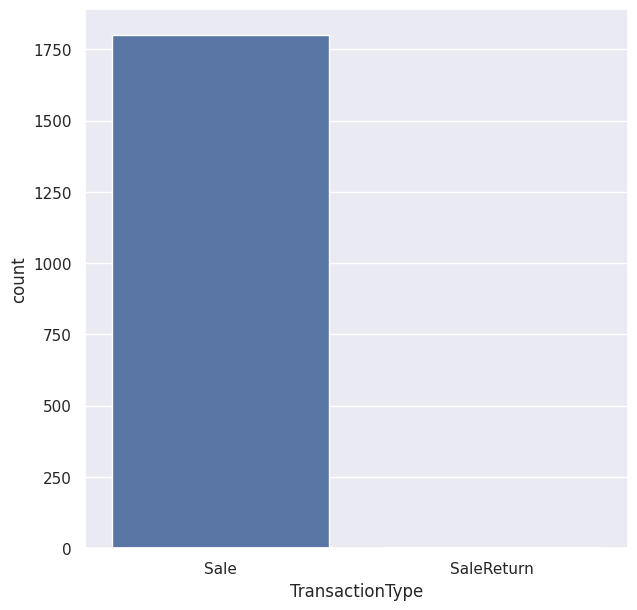

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='TransactionType', data=df)
plt.show()

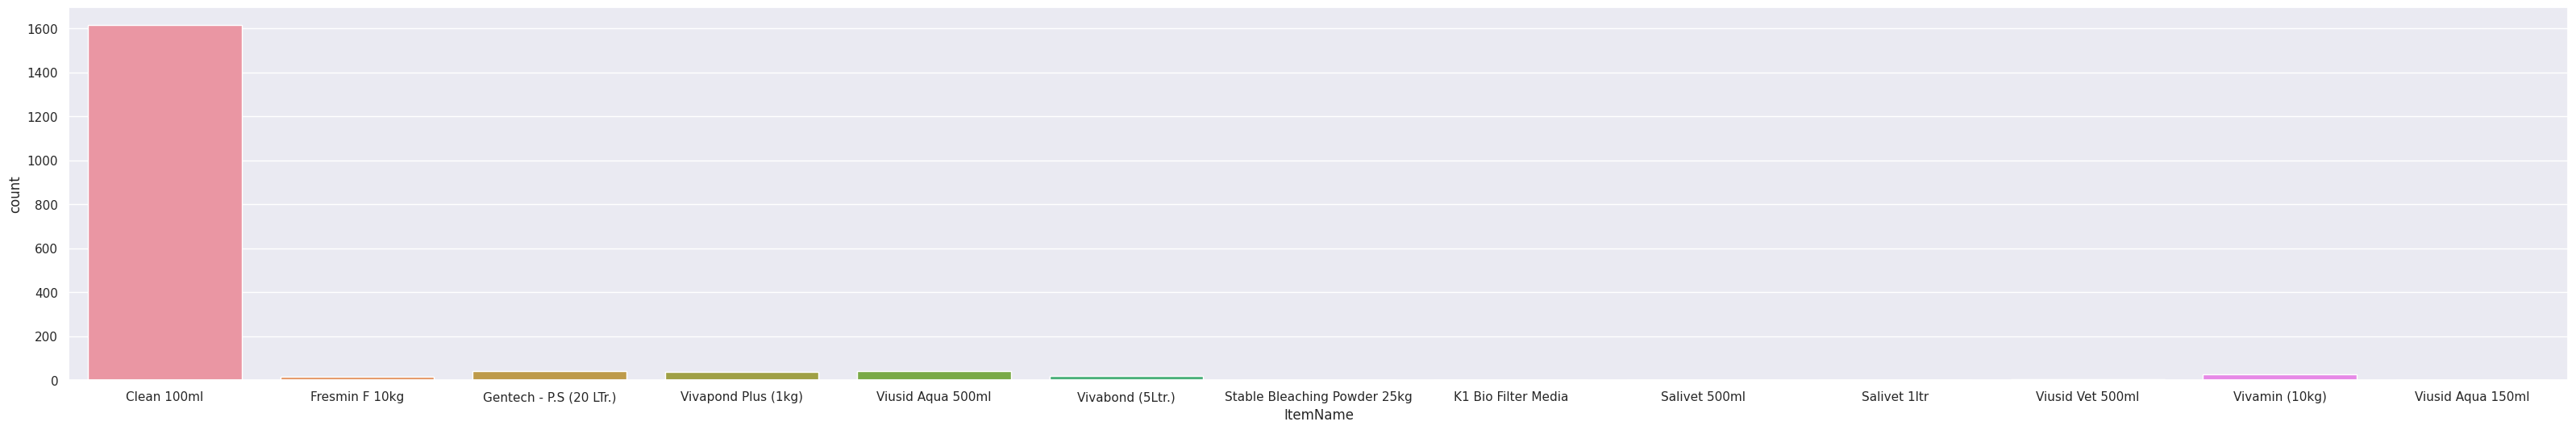

In [ ]:
plt.figure(figsize=(40,6))
sns.countplot(x='ItemName', data=df)
plt.show()

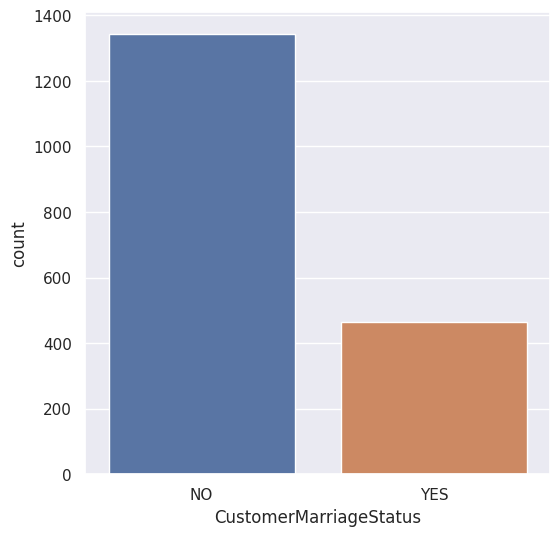

In [ ]:

plt.figure(figsize=(6,6))
sns.countplot(x='CustomerMarriageStatus', data=df)
plt.show()

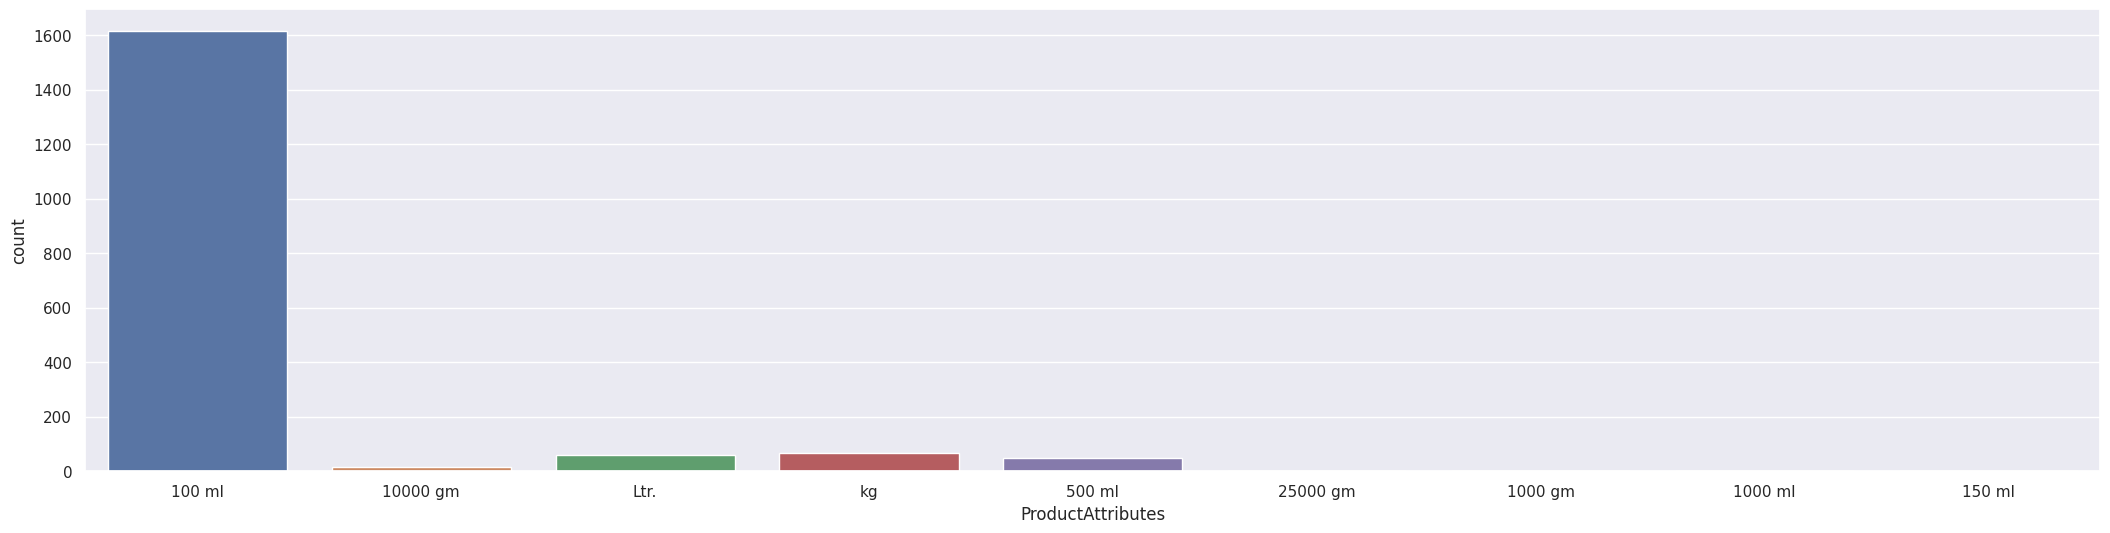

In [ ]:

plt.figure(figsize=(26,6))
sns.countplot(x='ProductAttributes', data=df)
plt.show()

encoder = LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['TransactionNo'] = encoder.fit_transform(df['TransactionNo'])
df['Cost'] = encoder.fit_transform(df['Cost'])
df['SaleQty'] = encoder.fit_transform(df['SaleQty'])
df['SaleBonusQty'] = encoder.fit_transform(df['SaleBonusQty'])
df['SaleTotalQty'] = encoder.fit_transform(df['SaleTotalQty'])
df['MRP'] = encoder.fit_transform(df['MRP'])
df['SaleAmount'] = encoder.fit_transform(df['SaleAmount'])
df['SR_Qty'] = encoder.fit_transform(df['SR_Qty'])
df['SR_BonusQty'] = encoder.fit_transform(df['SR_BonusQty'])
df['SR_TotalQty'] = encoder.fit_transform(df['SR_TotalQty'])

df['SR_Rate'] = encoder.fit_transform(df['SR_Rate'])
df['SR_Amount'] = encoder.fit_transform(df['SR_Amount'])
df['DiscountAmount'] = encoder.fit_transform(df['DiscountAmount'])
df['OtherCharge'] = encoder.fit_transform(df['OtherCharge'])
df['VATAmount'] = encoder.fit_transform(df['VATAmount'])
df['TAXAmount'] = encoder.fit_transform(df['TAXAmount'])
df['PerInvoiceAverageAmount'] = encoder.fit_transform(df['PerInvoiceAverageAmount'])
df['TransactionType'] = encoder.fit_transform(df['TransactionType'])
df['Location'] = encoder.fit_transform(df['Location'])
df['CustomerCode'] = encoder.fit_transform(df['CustomerCode'])
df['CustomerName'] = encoder.fit_transform(df['CustomerName'])
df['ItemCategory'] = encoder.fit_transform(df['ItemCategory'])
df['ItemCode'] = encoder.fit_transform(df['ItemCode'])
df['ItemName'] = encoder.fit_transform(df['ItemName'])
df['SKU'] = encoder.fit_transform(df['SKU'])
df['ProductAttributes'] = encoder.fit_transform(df['ProductAttributes'])
df['BatchNo'] = encoder.fit_transform(df['BatchNo'])
df['StockType'] = encoder.fit_transform(df['StockType'])
df['LocationAddress'] = encoder.fit_transform(df['LocationAddress'])
df['CustomerAddress'] = encoder.fit_transform(df['CustomerAddress'])
df['CustomerMarriageStatus'] = encoder.fit_transform(df['CustomerMarriageStatus'])
df['CustomerAgeInYear'] = encoder.fit_transform(df['CustomerAgeInYear'])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TransactionNo            1807 non-null   int64 
 1   TransactionDate          1807 non-null   object
 2   TransactionType          1807 non-null   int64 
 3   Location                 1807 non-null   int64 
 4   CustomerCode             1807 non-null   int64 
 5   CustomerName             1807 non-null   int64 
 6   ItemCategory             1807 non-null   int64 
 7   ItemCode                 1807 non-null   int64 
 8   ItemName                 1807 non-null   int64 
 9   SKU                      1807 non-null   int64 
 10  ProductAttributes        1807 non-null   int64 
 11  BatchNo                  1807 non-null   int64 
 12  StockType                1807 non-null   int64 
 13  Cost                     1807 non-null   int64 
 14  SaleQty                  1807 non-null  

In [ ]:
df.head()

,TransactionNo,TransactionDate,TransactionType,Location,CustomerCode,CustomerName,ItemCategory,ItemCode,ItemName,SKU,...,SR_Amount,DiscountAmount,OtherCharge,VATAmount,TAXAmount,LocationAddress,CustomerAddress,CustomerMarriageStatus,CustomerAgeInYear,PerInvoiceAverageAmount
0,1577,25-Oct-23,0,0,106,98,0,2,0,3,...,0,0,0,0,0,12,481,0,19,365
1,1576,25-Oct-23,0,0,107,441,0,2,0,3,...,0,0,0,0,0,12,478,0,21,78
2,1570,22-Oct-23,0,0,177,340,0,2,0,3,...,0,0,0,0,0,12,427,0,26,466
3,1569,21-Oct-23,0,0,98,105,0,2,0,3,...,0,0,0,0,0,12,41,0,17,136
4,1557,19-Oct-23,0,0,424,79,0,2,0,3,...,0,0,0,0,0,12,491,0,14,71


In [ ]:
df.drop(['CustomerBirthDate'],axis=1)

KeyError: ignored

In [ ]:
df.drop(['TransactionDate'],axis=1,inplace = True)

In [ ]:
X = df.drop(columns='SaleQty', axis=1)
Y = df['SaleQty']

In [ ]:
print(X)

      TransactionNo  TransactionType  Location  CustomerCode  CustomerName  \
0              1577                0         0           106            98   
1              1576                0         0           107           441   
2              1570                0         0           177           340   
3              1569                0         0            98           105   
4              1557                0         0           424            79   
...             ...              ...       ...           ...           ...   
1802             21                0        13            75           364   
1803           1579                1        13           172           383   
1804              6                0        13           172           383   
1805              3                0        13            71            64   
1806              2                0        13            70           347   

      ItemCategory  ItemCode  ItemName  SKU  ProductAttributes 

In [ ]:
print(Y)

0       46
1       10
2       20
3        6
4       20
        ..
1802    53
1803     0
1804    20
1805    27
1806    53
Name: SaleQty, Length: 1807, dtype: int64


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1807, 31) (1445, 31) (362, 31)


In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Training data prediction

In [ ]:
trainingDataPrediction = regressor.predict(X_train)

for checking performance of the model ,the value of the metrics library is 0 to 1 .
the line sees how close the predicted value to the original value.


In [ ]:
r2_train = metrics.r2_score(Y_train,trainingDataPrediction)

In [ ]:
print('R Squred value = ',r2_train)

R Squred value =  0.9999998640465697


In [ ]:
testDataPrediction = regressor.predict(X_test)

In [ ]:
r2_test =metrics.r2_score(Y_test,testDataPrediction)

In [ ]:
print('R Squred value = ',r2_test)

R Squred value =  0.9997985111137063
